<a href="https://colab.research.google.com/github/RolandTapie/Data_Projects/blob/main/Data_science/Bank/Bank_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Git Repo

**Import des packages**

In [ ]:
#!pip install nxviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
import missingno as msno
from itertools import combinations




from scipy.stats import iqr
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from google.colab import drive

**Montage du drive**

In [ ]:
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Lecture du dataset**

In [ ]:
file_path="https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/bank_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

**Renommage des colonnes**

In [ ]:
cible = "response"
feat=['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'response_binary']
feat=['age', 'balance','duration', 'campaign','pdays','loan']
one_hot_enconding=["job","marital","education","default","housing","loan","month","poutcome"]
one_hot_enconding=['loan']


**Description du dataset**

In [ ]:
df.describe()


,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

**Traiter le type des données**

In [ ]:
for col in df.columns:
  if "Unamed" in col:
    df=df.drop(col,axis=1)

colonnes=df.columns.tolist()

print("Les champs du Dataset")
print(colonnes)
for col in colonnes:
  if df[col].dtype=="object":
    df[col]=df[col].astype("category")

    print(f'les données du champ {col} de type {df[col].dtype} ont été changées en type category')
    print('\n')
    print('Avec les valeurs ci-dessous:')
    print('\n')
    print(df[col].unique())
    print('\n')

liste_cat=[col for col in df.columns if df[col].dtype=="category"]
liste_float_int=[col for col in df.columns if ((df[col].dtype=="int64")|(df[col].dtype=="float64"))]

print("*"*100)
print('la liste des champs de type float ou int')
print (liste_float_int)
print("*"*100)
print('la liste des champs de type category')
print (liste_cat)

Les champs du Dataset
['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'response_binary']
les données du champ marital de type category ont été changées en type category


Avec les valeurs ci-dessous:


['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


les données du champ education de type category ont été changées en type category


Avec les valeurs ci-dessous:


['tertiary', 'secondary', 'primary']
Categories (3, object): ['primary', 'secondary', 'tertiary']


les données du champ default de type category ont été changées en type category


Avec les valeurs ci-dessous:


['no', 'yes']
Categories (2, object): ['no', 'yes']


les données du champ housing de type category ont été changées en type category


Avec les valeurs ci-dessous:


['yes', 'no']
Categories (2, object): ['no', 'yes']


les données du champ loa

**Vérification des enrigistrements nulls**

In [ ]:
df.isna().any()

,0
Unnamed: 0,False
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
day,False


In [ ]:
msno.bar(df)

In [ ]:
msno.matrix(df)


In [ ]:
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

In [ ]:
# Supprimer les lignes où toutes les valeurs sont manquantes
df= df.dropna(how='all')

In [ ]:
print(len(df))

40841


# **EDA**

## **Vérifications des distributions**

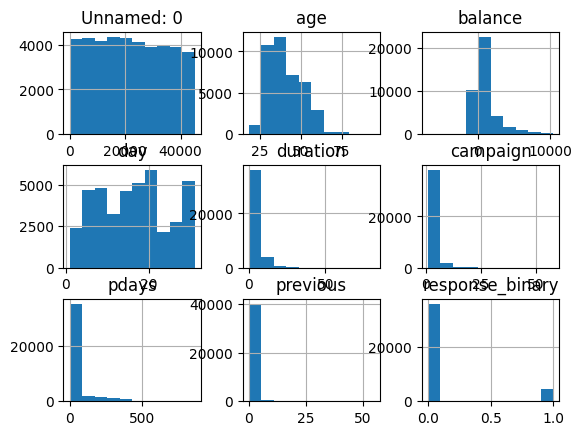

In [ ]:
df_num=df[liste_float_int]
df_num.hist()
plt.show()

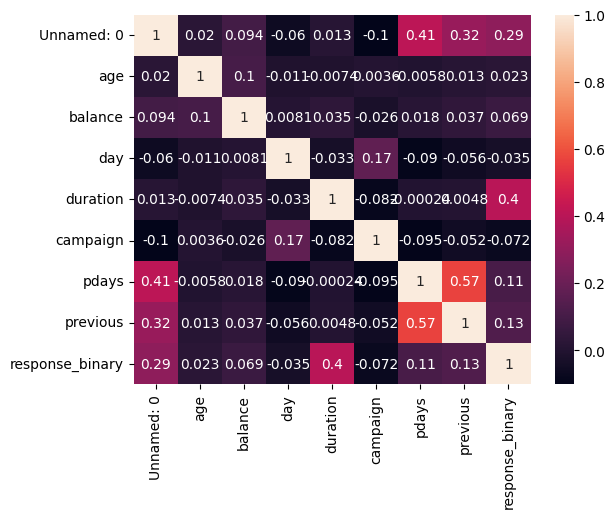

****************************************************************************************************
Liste des corrélations à analyser
****************************************************************************************************
Unnamed: 0 > pdays : 0.41
duration > response_binary : 0.401
pdays > Unnamed: 0 : 0.41
pdays > previous : 0.568
previous > pdays : 0.568
response_binary > duration : 0.401


In [ ]:
df_corr=df_num.corr()
sns.heatmap(df_corr,annot=True)
plt.show()
corr_limit=0.4
liste=[]
corr_check=[]
for i in range(len(df_corr)):
  for j in range(len(df_corr)):
    if (abs(df_corr.iloc[i,j])>=corr_limit)&(i!=j):
        corr_check.append((str(df_corr.columns[i])+ " > " + str(df_corr.columns[j])+ " : " + str(round(df_corr.iloc[i,j],3))))

print("*"*100)
print("Liste des corrélations à analyser")
print("*"*100)
for cor in corr_check:
  print(cor)

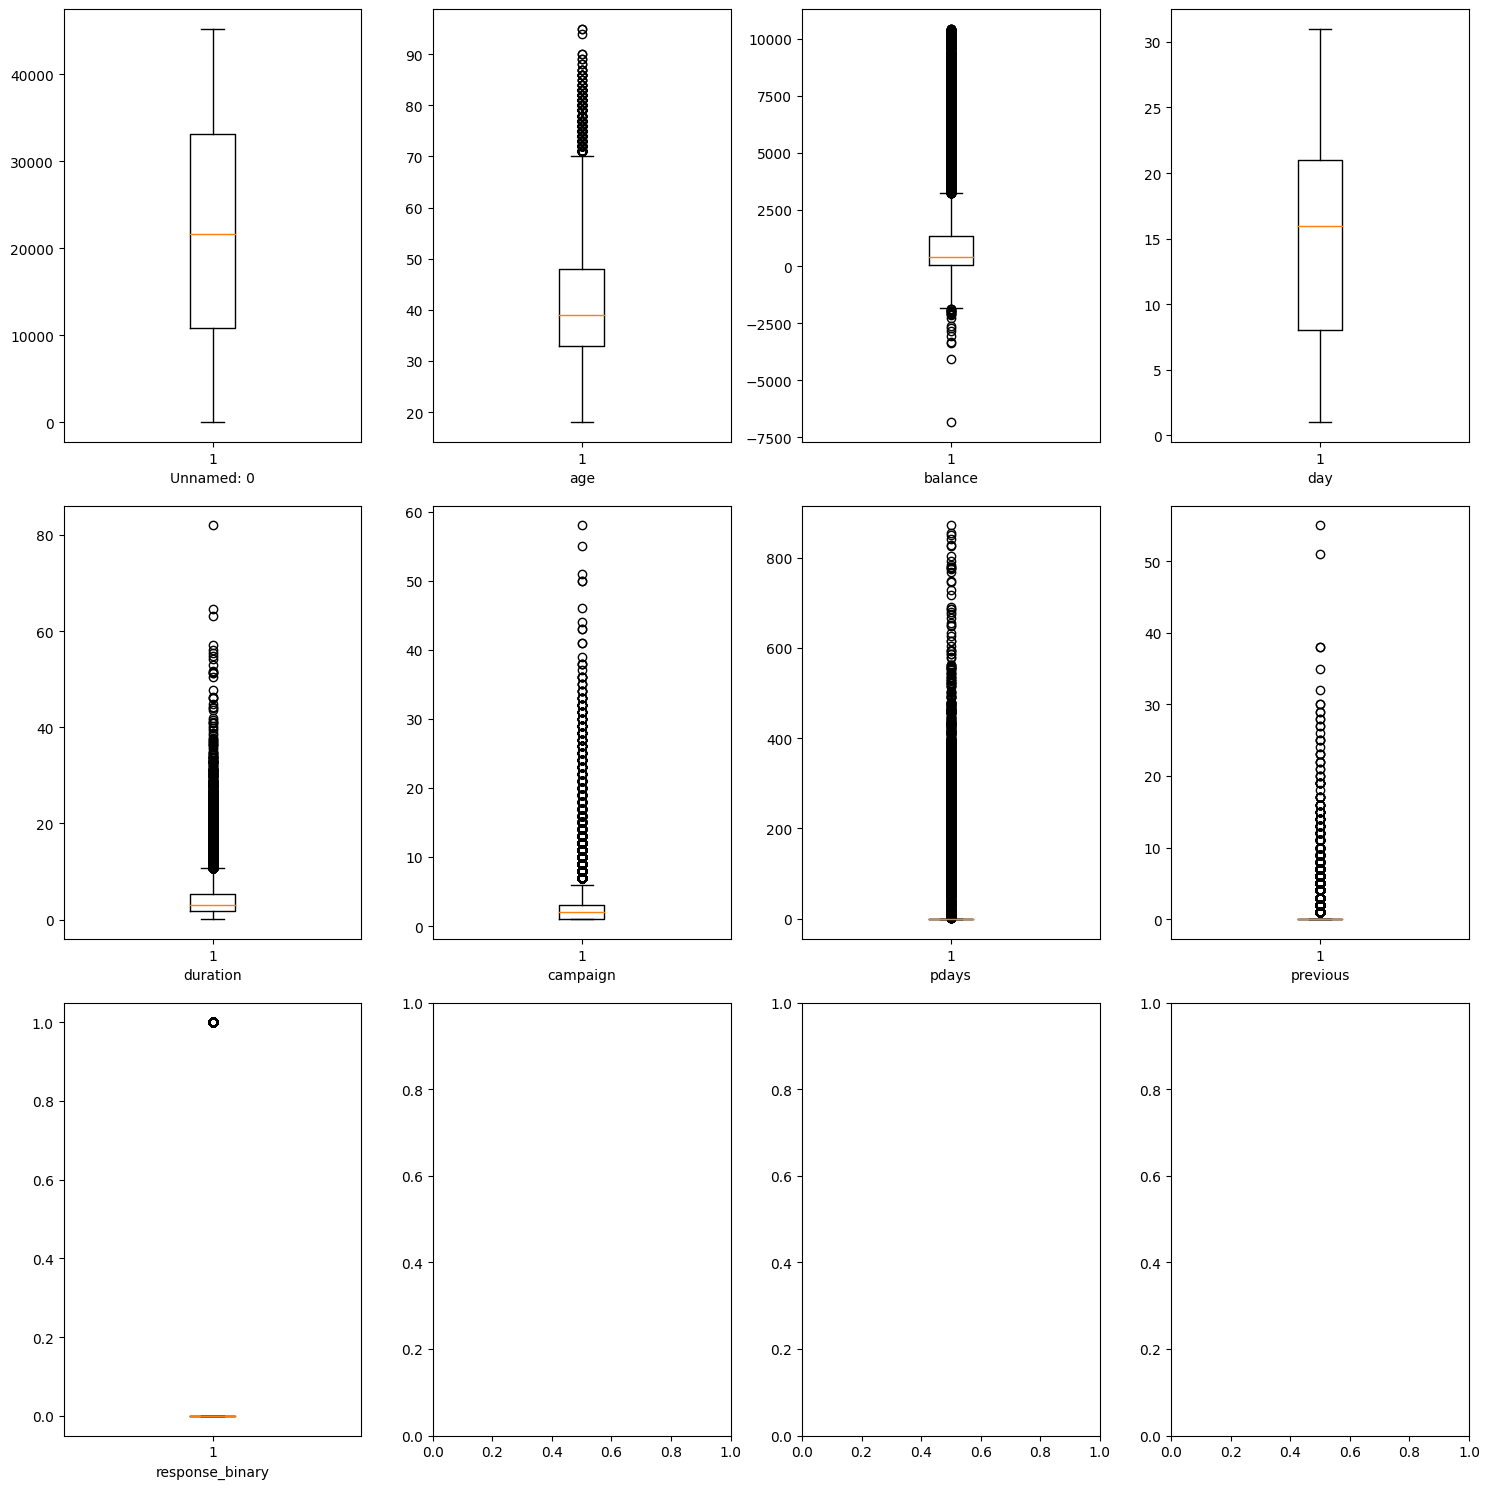

In [ ]:
size=len(liste_float_int)
fig, axes = plt.subplots((size//4)+1, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(liste_float_int):
  axes[i].boxplot(df[cols])
  axes[i].set_xlabel(cols)
plt.tight_layout()
plt.show()

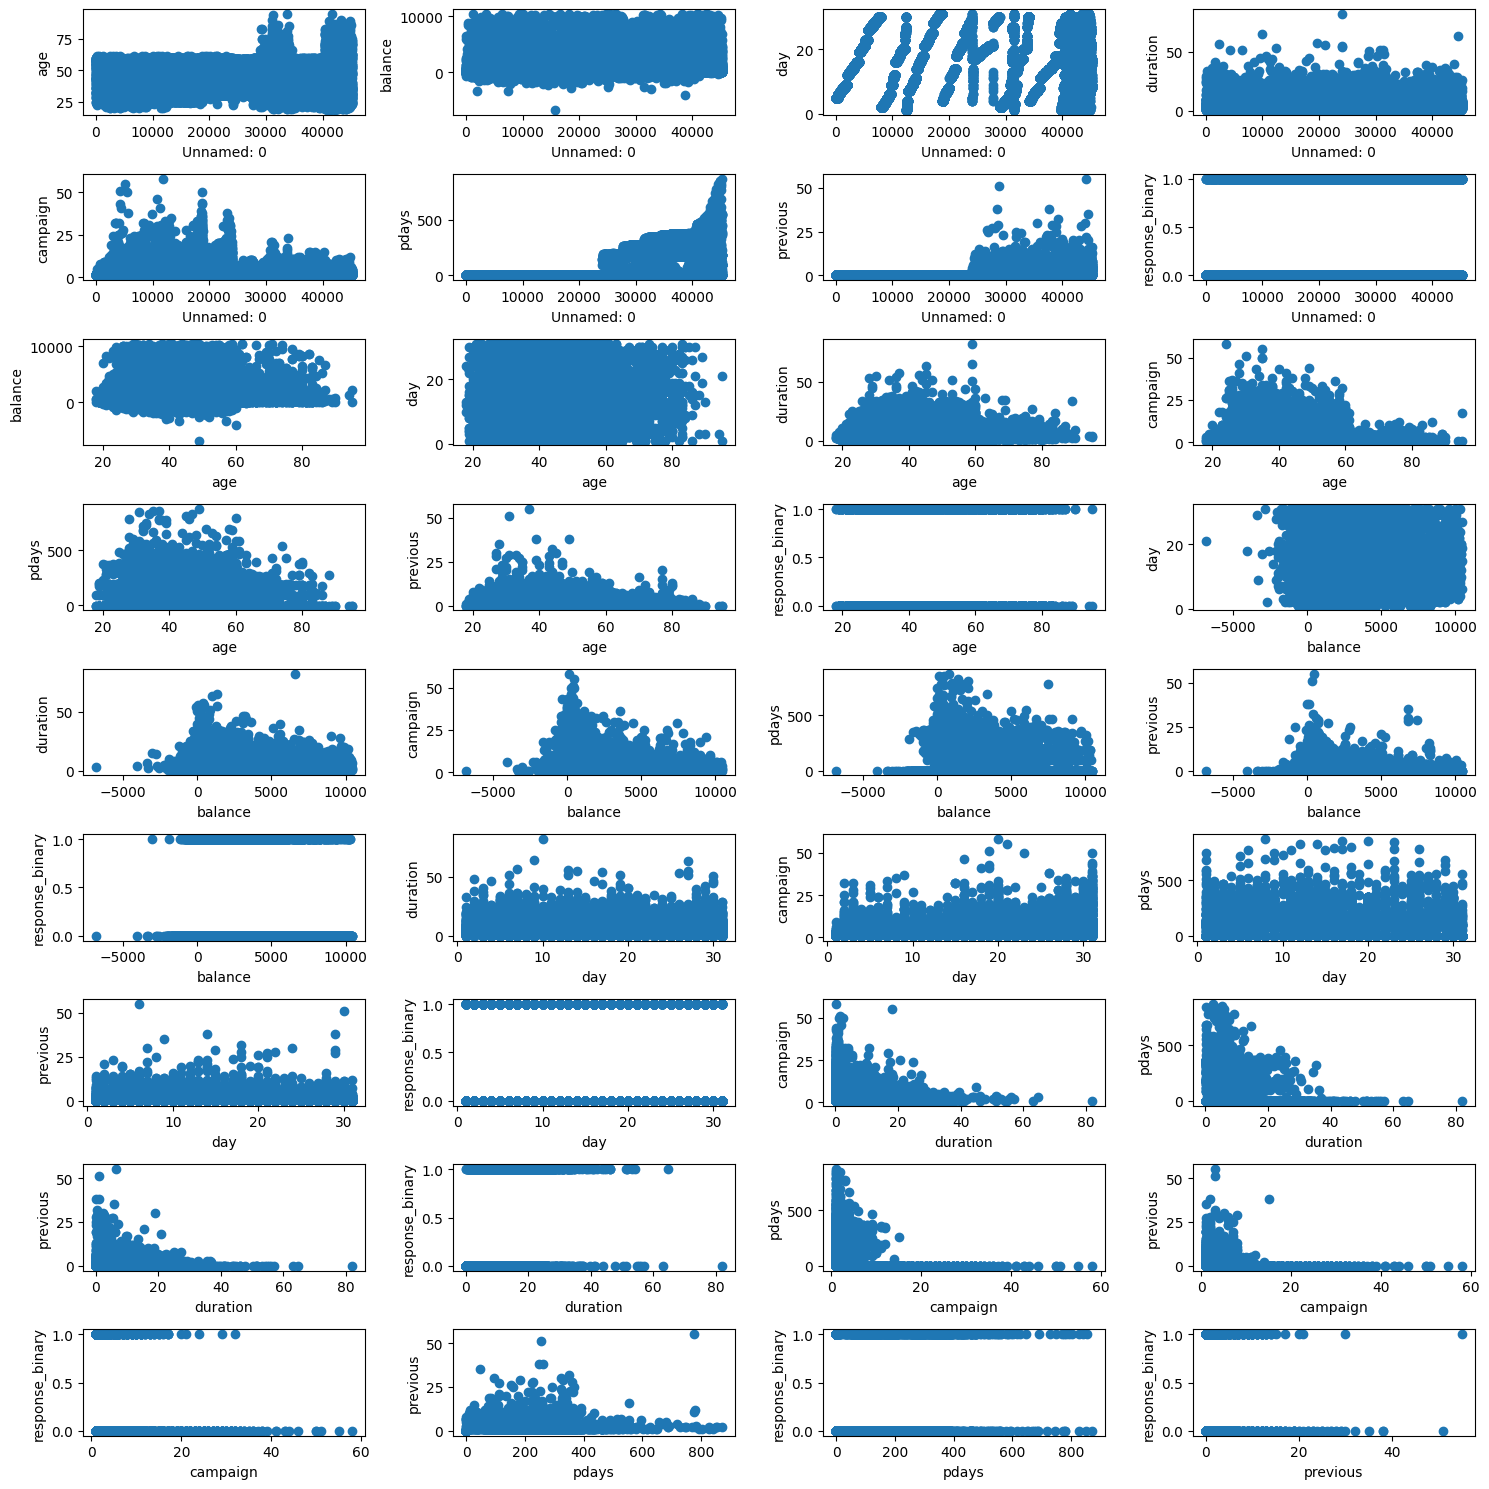

In [ ]:
size=len(list(combinations(liste_float_int,2)))
fig, axes = plt.subplots(size//4, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(combinations(liste_float_int,2)):
  axes[i].scatter(df[cols[0]], df[cols[1]])
  axes[i].set_xlabel(cols[0])
  axes[i].set_ylabel(cols[1])
plt.tight_layout()
plt.show()

Détection des valeurs abérantes

In [ ]:
df_corr=df[liste]
df_corr.describe()
for col in liste:
  print(col)
  print(iqr(df_corr[col]))

In [ ]:
for col in liste:
  print(col)
  plt.figure(figsize=(10,5))
  plt.boxplot(df[col])
  plt.show()

**Vérification des Corrélations**

**Lecture du dataset**

In [ ]:
features=df.drop("response", axis=1)
features = df[liste].values
targets=df["response_binary"].values
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
logreg=LogisticRegression(solver='lbfgs', max_iter=100)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred_proba=logreg.predict_proba(X_test)[:,1]
print(y_pred)
print(y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
features = df[feat]
features=pd.get_dummies(features,columns=one_hot_enconding,dtype=float, drop_first=True)
targets = df[cible]
targets=pd.get_dummies(targets,"response", drop_first=True,dtype=float)
features_train = features_train.select_dtypes(exclude=['object'])

NameError: name 'df' is not defined

In [ ]:
features.info()
targets.info()

In [ ]:
features = sm.add_constant(features)

In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(features, targets,test_size=0.2, random_state=42)

In [ ]:
features_train.info()
targets_train.info()

In [ ]:
logit_model = sm.Logit(targets_train, features_train)

In [ ]:
result = logit_model.fit()

In [ ]:
print(result.summary())

# Nouvelle section

# Nouvelle section